## Observations and Insights 

In [452]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined_data_df= pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview

combined_data_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [453]:
# Checking the number of mice.
mouse_count= combined_data_df["Mouse ID"].value_counts()

mouse_count.head()

g989    13
y793    10
a963    10
e476    10
n364    10
Name: Mouse ID, dtype: int64

In [454]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice= combined_data_df.loc[combined_data_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

duplicate_mice

array(['g989'], dtype=object)

In [455]:
# Optional: Get all the data for the duplicate mouse ID. 

In [456]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleaned_combined_data= combined_data_df[combined_data_df['Mouse ID'].isin(duplicate_mice)==False]

cleaned_combined_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [457]:
# Checking the number of mice in the clean DataFrame.
mouse_count2= cleaned_combined_data["Mouse ID"].value_counts()

mouse_count2.head()

y793    10
a963    10
t724    10
e476    10
n364    10
Name: Mouse ID, dtype: int64

## Summary Statistics

In [458]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#Calculate Mean
Mean = cleaned_combined_data_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']

#Calculate Median
Median = cleaned_combined_data_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']

#Calculate Variance
Variance = cleaned_combined_data_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']

#Calculate Standard Deviation
Std_Deviation = cleaned_combined_data_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']

#Calculate SEM
SEM = cleaned_combined_data_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

Drug_Regiment_Table=pd.DataFrame(Mean, Median, Variance,Std_Deviation,SEM)

#Label Columns of Table, Mean, Median, Variance, etc. 

Drug_Regimen_Table['Mean']= Mean
Drug_Regimen_Table['Median']= Median
Drug_Regimen_Table['Variance']= Variance
Drug_Regimen_Table['Standard Deviation']= Std_Deviation
Drug_Regimen_Table['SEM']= SEM

#Clean format
Drug_Regimen_Table['Mean']=Drug_Regimen_Table['Mean'].map("{:,.2f}".format)
Drug_Regimen_Table['Median']=Drug_Regimen_Table['Median'].map("{:,.2f}".format)
Drug_Regimen_Table['Variance']=Drug_Regimen_Table['Variance'].map("{:,.2f}".format)
Drug_Regimen_Table['Standard Deviation']=Drug_Regimen_Table['Standard Deviation'].map("{:,.2f}".format)
Drug_Regimen_Table['SEM']=Drug_Regimen_Table['SEM'].map("{:,.2f}".format)

Drug_Regimen_Table.head()

,Tumor Volume (mm3),Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,,
Capomulin,40.675741,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.591172,52.59,51.78,39.29,6.27,0.47
Infubinol,52.884795,52.88,51.82,43.13,6.57,0.49
Ketapril,55.235638,55.24,53.70,68.55,8.28,0.60
Naftisol,54.331565,54.33,52.51,66.17,8.13,0.60


In [459]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

groupby_regimen= cleaned_combined_data_df.groupby("Drug Regimen") 
Regimen_Sorted=groupby_regimen.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]

#Clean Format
Regimen_Sorted['mean']=Regimen_Sorted['mean'].map("{:,.2f}".format)
Regimen_Sorted['median']=Regimen_Sorted['median'].map("{:,.2f}".format)
Regimen_Sorted['var']=Regimen_Sorted['var'].map("{:,.2f}".format)
Regimen_Sorted['std']=Regimen_Sorted['std'].map("{:,.2f}".format)
Regimen_Sorted['sem']=Regimen_Sorted['sem'].map("{:,.2f}".format)


Regimen_Sorted.head()

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60


## Bar and Pie Charts

In [460]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

#create table with count of timepoints/drug regimen 

Bar_Chart = cleaned_combined_data_df.groupby('Drug Regimen').count()['Timepoint']
Timepoint_Regimen= pd.DataFrame(Bar_Chart)

Timepoint_Regimen


,Timepoint
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


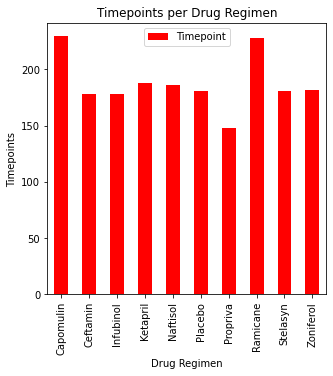

In [461]:
#set-up Bar Chart to show how many instances a certain drug regimen was utilized

Timepoint_Regimen.plot(kind="bar", figsize=(5,5), color = "r", legend=True)

plt.ylabel("Timepoints")
plt.xlabel("Drug Regimen")
plt.title("Timepoints per Drug Regimen")
plt.savefig('Timepoint_Regimen_Bar')

In [462]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
Reset_BarChart = Timepoint_Regimen.reset_index()

Reset_BarChart.head()

,Drug Regimen,Timepoint
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186


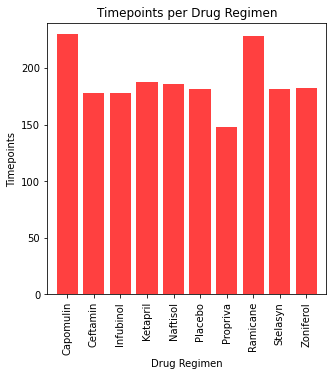

In [463]:
x_axis = np.arange(len(Bar_Chart))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(5,5))

plt.bar(x_axis, Timepoint_Regimen['Timepoint'], alpha=0.75, align="center", color="r")
plt.xticks(tick_locations, Reset_BarChart['Drug Regimen'],rotation="vertical")

plt.xlim(-0.75, len(Bar_Chart)-.25)
plt.ylim(0, 240)

plt.ylabel("Timepoints")
plt.xlabel("Drug Regimen")
plt.title("Timepoints per Drug Regimen")
plt.savefig('Timepoint_Regimen_Bar_2')

plt.show()

In [464]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#group data by sex/gender

Sex_Data= cleaned_combined_data.groupby("Sex").count()

Sex_Data

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,922,922,922,922,922,922,922
Male,958,958,958,958,958,958,958


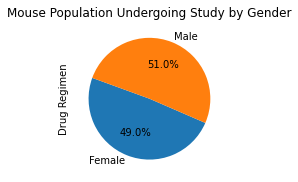

In [465]:
axis1= plt.subplot(121, aspect = 'equal')

Sex_Data.plot(kind='pie', title="Mouse Population Undergoing Study by Gender", y = "Drug Regimen", ax=axis1, autopct = '%1.1f%%',
              startangle = 160, shadow = False, legend = False, fontsize = 10)

plt.savefig('Sex_Data_Pie')
plt.show()

In [568]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

Gender_Data= cleaned_combined_data.groupby("Sex").count()
Gender_Data

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,922,922,922,922,922,922,922
Male,958,958,958,958,958,958,958


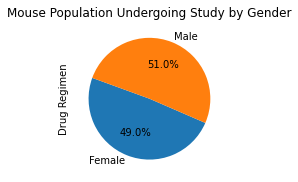

In [590]:
axis1= plt.subplot(121, aspect = 'equal')

Gender_Data.plot(kind='pie', title="Mouse Population Undergoing Study by Gender", y = "Drug Regimen", ax=axis1, autopct = '%1.1f%%',
              startangle = 160, shadow = False, legend = False, fontsize = 10)

plt.savefig('Gender_Data_Pie')
plt.show()

## Quartiles, Outliers and Boxplots

In [468]:
cleaned_combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [469]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Put treatments into a list for for loop (and later for plot labels)

#Set Dataframe for each Drug Regimen for future calculations
Capoumlin= cleaned_combined_data.loc[cleaned_combined_data["Drug Regimen"] == "Capomulin",:]
Ramicane = cleaned_combined_data.loc[cleaned_combined_data["Drug Regimen"] == "Ramicane",:]
Infubinol= cleaned_combined_data.loc[cleaned_combined_data["Drug Regimen"] == "Infubinol",:]
Ceftamin= cleaned_combined_data.loc[cleaned_combined_data["Drug Regimen"] == "Ceftamin", :]

Treatments=["Capoumlin", "Ramicane", "Infubinol","Ceftamin"]
Treatments

['Capoumlin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [470]:
Capoumlin.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [471]:
# Start by getting the last (greatest) timepoint for each mouse and Merge this group df with the original 
#dataframe to get the tumor volume at the last timepoint

#Capoumlin
Cap_Groupby = Capoumlin.groupby('Mouse ID').max()['Timepoint']
Capoumlin_Greatest= pd.DataFrame(Cap_Groupby)
Cap_Merge= pd.merge(Capoumlin_Greatest, cleaned_combined_data, on=("Mouse ID", "Timepoint"),how="left")

Cap_Merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [472]:
Cap_Timepoint_Mouse= Cap_Merge["Tumor Volume (mm3)"]

Cap_Timepoint_Mouse.head()

0    38.982878
1    38.939633
2    30.485985
3    37.074024
4    40.159220
Name: Tumor Volume (mm3), dtype: float64

In [473]:
#Ramicane
Ram_Groupby= Ramicane.groupby('Mouse ID').max()['Timepoint']
Ramicane_Greatest= pd.DataFrame(Ram_Groupby)
Ram_Merge= pd.merge(Ramicane_Greatest, cleaned_combined_data, on=("Mouse ID", "Timepoint"),how="left")

Ram_Merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [474]:
Ram_Timepoint_Mouse= Ram_Merge["Tumor Volume (mm3)"]

Ram_Timepoint_Mouse.head()

0    38.407618
1    43.047543
2    38.810366
3    32.978522
4    38.342008
Name: Tumor Volume (mm3), dtype: float64

In [475]:
#Infubinol
Inf_Groupby= Infubinol.groupby('Mouse ID').max()['Timepoint']
Infubinol_Greatest= pd.DataFrame(Inf_Groupby)
Inf_Merge= pd.merge(Infubinol_Greatest, cleaned_combined_data, on=("Mouse ID", "Timepoint"),how="left")

Inf_Merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [476]:
Inf_Timepoint_Mouse= Inf_Merge["Tumor Volume (mm3)"]

Inf_Timepoint_Mouse.head()

0    67.973419
1    65.525743
2    57.031862
3    66.083066
4    72.226731
Name: Tumor Volume (mm3), dtype: float64

In [477]:
#Ceftamin
Cef_Groupby= Ceftamin.groupby('Mouse ID').max()['Timepoint']
Ceftamin_Greatest= pd.DataFrame(Cef_Groupby)
Cef_Merge= pd.merge(Ceftamin_Greatest, cleaned_combined_data, on=("Mouse ID", "Timepoint"),how="left")

Cef_Merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [478]:
Cef_Timepoint_Mouse= Cef_Merge["Tumor Volume (mm3)"]

Cef_Timepoint_Mouse.head()

0    62.999356
1    45.000000
2    56.057749
3    55.742829
4    48.722078
Name: Tumor Volume (mm3), dtype: float64

In [511]:
# Create empty list to fill with tumor vol data (for plotting) 

Tumor_Volume=[Cap_Timepoint_Mouse,Ram_Timepoint_Mouse, Inf_Timepoint_Mouse,Cef_Timepoint_Mouse]
Tumor_Volume

[0     38.982878
 1     38.939633
 2     30.485985
 3     37.074024
 4     40.159220
 5     47.685963
 6     37.311846
 7     38.125164
 8     38.753265
 9     41.483008
 10    38.846876
 11    28.430964
 12    33.329098
 13    46.539206
 14    32.377357
 15    41.581521
 16    23.343598
 17    40.728578
 18    34.455298
 19    31.023923
 20    40.658124
 21    39.952347
 22    36.041047
 23    28.484033
 24    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 0     38.407618
 1     43.047543
 2     38.810366
 3     32.978522
 4     38.342008
 5     33.397653
 6     37.311236
 7     40.659006
 8     29.128472
 9     33.562402
 10    36.374510
 11    31.560470
 12    36.134852
 13    22.050126
 14    30.564625
 15    31.095335
 16    45.220869
 17    36.561652
 18    37.225650
 19    43.419381
 20    30.276232
 21    40.667713
 22    43.166373
 23    44.183451
 24    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 0     67.973419
 1     65.525743
 2     57.031862
 3     66.083

In [512]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes 
    # add subset 
    # Determine outliers using upper and lower bounds

In [513]:
#Calculations

#Cap
quartiles_cap = Cap_Timepoint_Mouse.quantile([.25,.5,.75])
lowerq_cap = quartiles[0.25]
upperq_cap= quartiles[0.75]
iqr_cap = upperq-lowerq

#Ram
quartiles_ram = Ram_Timepoint_Mouse.quantile([.25,.5,.75])
lowerq_ram= quartiles[0.25]
upperq_ram = quartiles[0.75]
iqr_ram = upperq-lowerq

#Inf
quartiles_inf = Inf_Timepoint_Mouse.quantile([.25,.5,.75])
lowerq_inf = quartiles[0.25]
upperq_inf = quartiles[0.75]
iqr_inf = upperq-lowerq

#Cef
quartiles_cef = Cef_Timepoint_Mouse.quantile([.25,.5,.75])
lowerq_cef = quartiles[0.25]
upperq_cef = quartiles[0.75]
iqr_cef = upperq-lowerq


In [514]:
#Cap

print(f"Capomulin Data:")
print(f"Upper quartile of Tumor Volume is: {upperq_cap}.")
print(f"Lower quartile of Tumor Volume is: {lowerq_cap}.")
print(f"Interquartile range of Tumor Volume is: {iqr_cap}.")
print(f"Median of Tumor Volume is: {quartiles_cap[0.5]}.")

lower_bound_cap = lowerq_cap - (1.5*iqr_cap)
upper_bound_cap = upperq_cap + (1.5*iqr_cap)
print(f"Values between {upper_bound_cap}, {lower_bound_cap} are potential outliers.")

Capomulin Data:
Upper quartile of Tumor Volume is: 64.29983003.
Lower quartile of Tumor Volume is: 48.72207785.
Interquartile range of Tumor Volume is: 15.577752179999997.
Median of Tumor Volume is: 38.1251644.
Values between 87.66645829999999, 25.355449580000002 are potential outliers.


In [515]:
#Ram

print(f"Ramicane Data:")
print(f"Upper quartile of Tumor Volume is: {upperq_ram}.")
print(f"Lower quartile of Tumor Volume is: {lowerq_ram}.")
print(f"Interquartile range of Tumor Volume is: {iqr_ram}.")
print(f"Median of Tumor Volume is: {quartiles_ram[0.5]}.")

lower_bound_ram = lowerq_ram - (1.5*iqr_ram)
upper_bound_ram = upperq_ram + (1.5*iqr_ram)
print(f"Values between {upper_bound_ram} & {lower_bound_ram}  are potential outliers.") 


Ramicane Data:
Upper quartile of Tumor Volume is: 64.29983003.
Lower quartile of Tumor Volume is: 48.72207785.
Interquartile range of Tumor Volume is: 15.577752179999997.
Median of Tumor Volume is: 36.56165229.
Values between 87.66645829999999 & 25.355449580000002  are potential outliers.


In [517]:
#Inf

print(f" Infubinol Data:")
print(f"Upper quartile of Tumor Volume is: {upperq_inf}.")
print(f"Lower quartile of Tumor Volume is: {lowerq_inf}.")
print(f"Interquartile range of Tumor Volume is: {iqr_inf}.")
print(f"Median of Tumor Volume is: {quartiles_inf[0.5]}.")

lower_bound_inf = lowerq_inf - (1.5*iqr_inf)
upper_bound_inf = upperq_ram + (1.5*iqr_inf)
print(f"Values between {upper_bound_inf} & {lower_bound_inf} are potential outliers.") 


 Infubinol Data:
Upper quartile of Tumor Volume is: 64.29983003.
Lower quartile of Tumor Volume is: 48.72207785.
Interquartile range of Tumor Volume is: 15.577752179999997.
Median of Tumor Volume is: 60.16518046.
Values between 87.66645829999999 & 25.355449580000002 are potential outliers.


In [518]:
#Cef

print(f"Ceftamin Data:")
print(f"Upper quartile of tumor volume is: {upperq_cef}.")
print(f"Lower quartile of tumor volume is: {lowerq_cef}.")
print(f"Interquartile range of tumor volume is: {iqr_cef}.")
print(f"Median of tumor volume is: {quartiles_cef[0.5]}.")

lower_bound_cef = lowerq_cef - (1.5*iqr_cef)
upper_bound_cef = upperq_cef + (1.5*iqr_cef)
print(f"Values between{upper_bound_cef} & {lower_bound_cef} are potential outliers.") 


Ceftamin Data:
Upper quartile of tumor volume is: 64.29983003.
Lower quartile of tumor volume is: 48.72207785.
Interquartile range of tumor volume is: 15.577752179999997.
Median of tumor volume is: 59.85195552.
Values between87.66645829999999 & 25.355449580000002 are potential outliers.


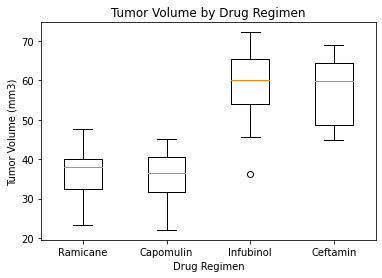

In [526]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume by Drug Regimen')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')

plt.boxplot(Tumor_Volume, labels=["Ramicane","Capomulin","Infubinol","Ceftamin"])

plt.savefig('Tumor_Volume_Box_Chart')
plt.show()


## Line and Scatter Plots

In [532]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#Define dataframe and reset index for Capomulin
Capomulin= cleaned_combined_data.loc[cleaned_combined_data["Drug Regimen"] == "Capomulin"]
Capomulin= Capomulin.reset_index()
Capomulin.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0


In [544]:
#Choose one Mouse ID to plot Tumor Volume vs. Timepoint per instruction

Capomulin_Mouse = Capomulin.loc[Capomulin["Mouse ID"] == "s185"]
Capomulin_Mouse = Capomulin_Mouse.loc[:,["Timepoint", "Tumor Volume (mm3)"]]
Capomulin_Mouse

,Timepoint,Tumor Volume (mm3)
0,0,45.000000
1,5,43.878496
2,10,37.614948
3,15,38.177232
4,20,36.866876
5,25,33.949940
6,30,32.959671
7,35,28.328531
8,40,25.472143
9,45,23.343598


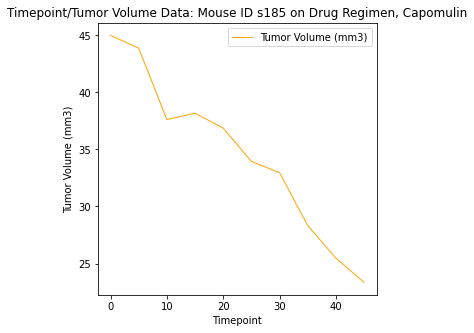

In [548]:
Capomulin_Mouse.set_index('Timepoint').plot(figsize=(5,5), linewidth=1, color='orange')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Timepoint/Tumor Volume Data: Mouse ID s185 on Drug Regimen, Capomulin")

plt.show()

In [550]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#set data frame for scatter plot
Capomulin = Capomulin.loc[:,["Mouse ID", "Tumor Volume (mm3)", "Weight (g)"]]
Capomulin.head()


,Mouse ID,Tumor Volume (mm3),Weight (g)
0,s185,45.000000,17
1,s185,43.878496,17
2,s185,37.614948,17
3,s185,38.177232,17
4,s185,36.866876,17


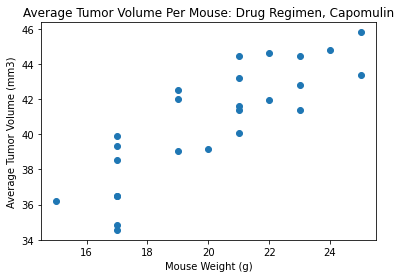

In [554]:
#Determine average (mean) tumor volume for mice on Capomulin and groupby mean
Av_Tumor_Volume_Cap= Capomulin.groupby(['Mouse ID']).mean()

#Plot Scatter Chart
plt.scatter(Av_Tumor_Volume_Cap['Weight (g)'],Av_Tumor_Volume_Cap['Tumor Volume (mm3)'])
plt.title("Average Tumor Volume Per Mouse: Drug Regimen, Capomulin")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('Average_Tumor_Vol_Cap')
plt.show()

## Correlation and Regression

In [557]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

Correlation_Coefficient=round(st.pearsonr(Av_Tumor_Volume_Cap['Weight (g)'],Av_Tumor_Volume_Cap['Tumor Volume (mm3)'])[0],2)
print(f"The correlation coefficient between Mouse Weight and Average Tumor Volume is {Correlation_Coefficient}.")


The correlation coefficient between Mouse Weight and Average Tumor Volume is 0.84.


In [559]:
#Linear Regression Model

Linear_Reg_Model=st.linregress(Av_Tumor_Volume_Cap['Weight (g)'],Av_Tumor_Volume_Cap['Tumor Volume (mm3)'])
Linear_Reg_Model

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.12754359033201337, intercept_stderr=2.5909876867683486)

In [560]:
#Set Slope and Y-Intercept based on Linear Reg Model

slope=0.9544396890241045
intercept=21.552160532685015

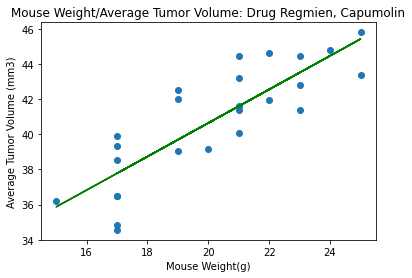

In [567]:
#Plot Chart

y_value = Av_Tumor_Volume_Cap['Weight (g)']*slope+intercept
plt.scatter(Av_Tumor_Volume_Cap['Weight (g)'],Av_Tumor_Volume_Cap['Tumor Volume (mm3)'])
plt.plot(Av_Tumor_Volume_Cap['Weight (g)'],y_value,color="green")
plt.xlabel('Mouse Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Mouse Weight/Average Tumor Volume: Drug Regmien, Capumolin")

plt.savefig('Av_Tumor_Weight_Linear_Reg')
plt.show()